<a href="https://colab.research.google.com/github/spros1/Methods-and-Algorithms_Work_Semester_21-22/blob/main/Meteorological_Measurements_AthensCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecast models for meteorological measurements from Center of Athens

###We are going to work with two datasets :
|Train dataset period |Test Dataset|
----------------------|------------|
|   2009 - 2016       | 2017       |

<br>

###Both datasets fields stracture it is the same : <br>

1. Month of the Year (1, 2, . . . , 12) as month
2. Maximum Temperature Value as maxtemp
3. Minimum Temperature Value as mintemp
4. Degree heating days       as heatdegree
5. Degree of cooling days    as cooldegree
6. Rainfall Height           as rainheight
7. Average Wind Speed        as avgwindspeed
8. Max Wind Speed            as mazwindspeed




In [2]:
## Upload files - Run the same cell twice to upload both athens_09_16 and athens_2017 files
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving athens_2017.dat to athens_2017.dat


In [15]:
## put data of both files into dataframes
df_09_16 = pd.read_csv("athens_09-16.dat", header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])
df_17    = pd.read_csv("athens_2017.dat" , header=None, sep = ' ', names=["month", "maxtemp", "mintemp", "heatdegree","cooldegree","rainheight","avgwindspeed","mazwindspeed"])


df_17.shape

(365, 8)

# Check values for both files
First for athens_09-16.dat

In [22]:
## imports for data investigations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
# total rows and columns
df_09_16.shape

(2442, 8)

In [16]:
## check values
df_09_16.head()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
0,1.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1,10.0,25.3,16.6,0.3,2.7,0.0,1.4,16.1
2,12.0,15.8,4.2,8.3,0.0,3.4,1.6,24.1
3,12.0,11.2,5.8,9.0,0.0,0.0,7.7,38.6
4,5.0,23.6,18.2,0.0,1.7,0.0,8.4,37.0


In [19]:
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   float64
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(8)
memory usage: 152.8 KB


In [20]:
# ckeck statistics
df_09_16.describe()

,month,maxtemp,mintemp,heatdegree,cooldegree,rainheight,avgwindspeed,mazwindspeed
count,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000
mean,6.594595,23.439476,15.893857,2.580262,3.809541,1.317035,4.694513,29.304709
std,3.428837,7.660457,6.809994,3.402915,4.472352,5.194972,3.230696,9.809560
min,1.000000,5.000000,0.400000,0.000000,0.000000,0.000000,0.300000,8.000000
25%,4.000000,17.400000,10.300000,0.000000,0.000000,0.000000,2.400000,22.500000
50%,7.000000,23.000000,15.400000,0.700000,1.400000,0.000000,3.700000,29.000000
75%,10.000000,30.200000,22.000000,4.600000,7.775000,0.000000,6.300000,35.400000
max,12.000000,39.800000,30.300000,15.300000,16.400000,97.000000,17.700000,70.800000


In [21]:
# search for missing values -- no missing values
df_09_16.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0])

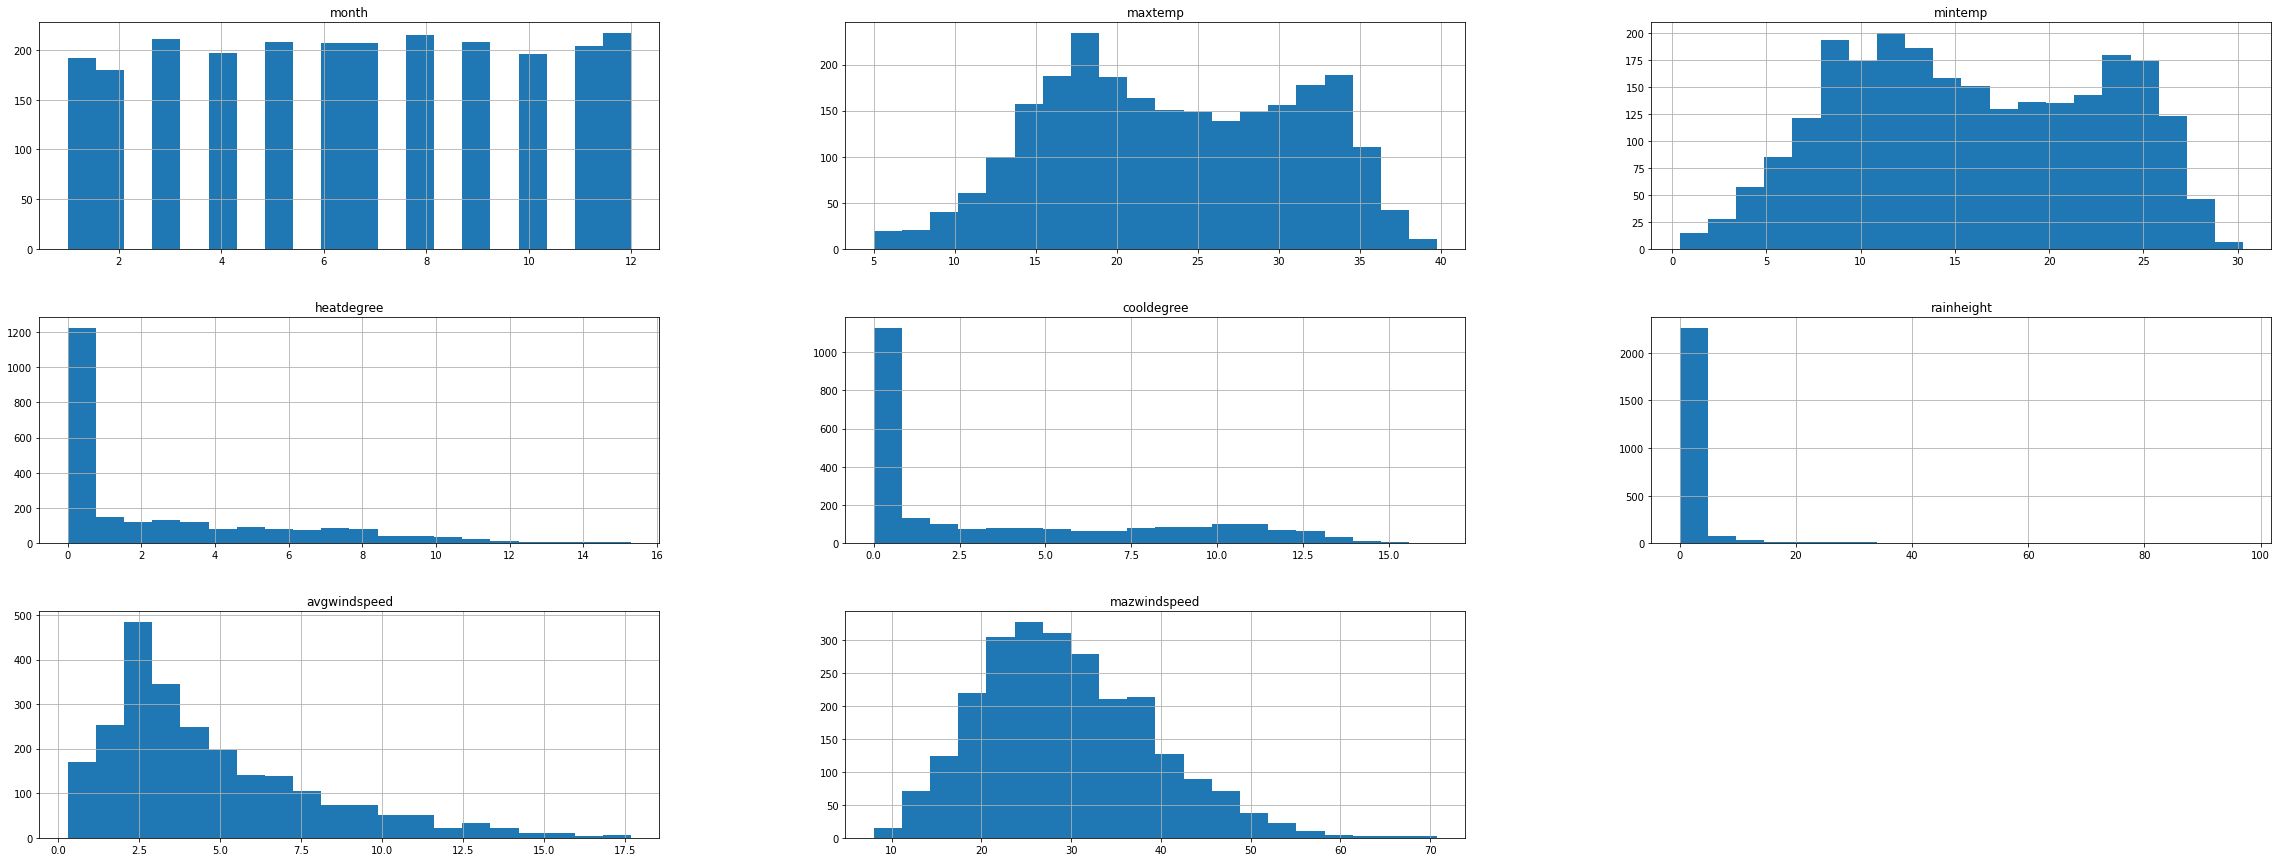

In [26]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df_09_16.hist(figsize = (40,15), bins = 20)
plt.show()

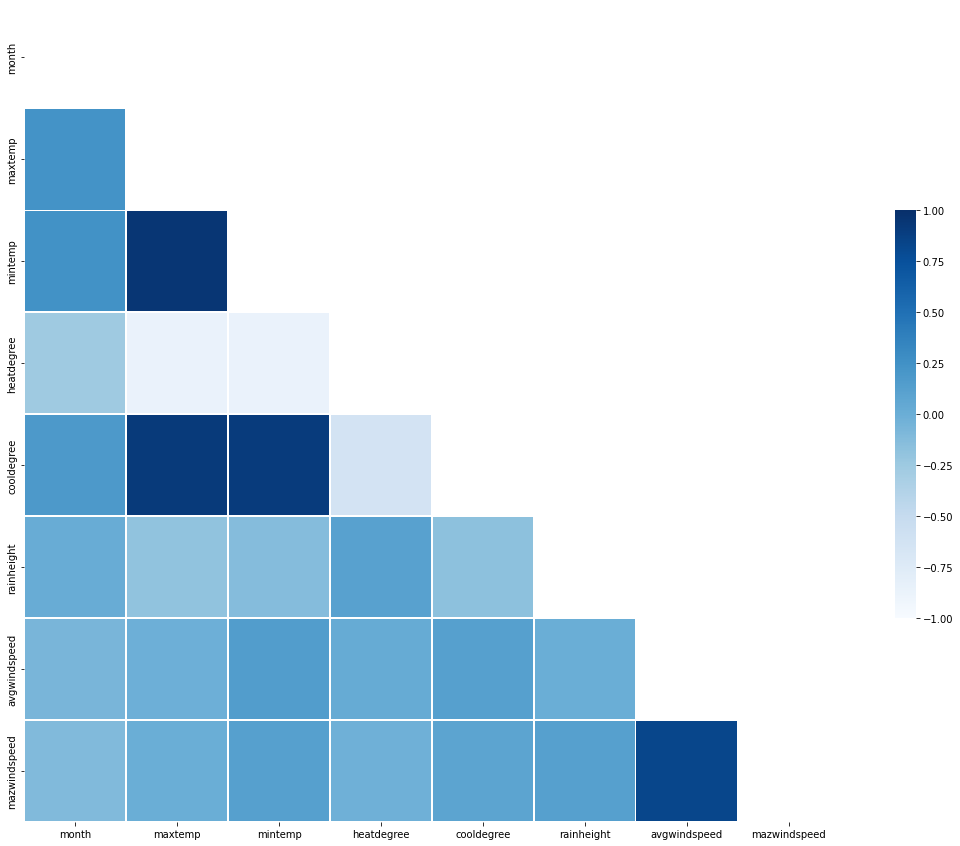

In [30]:
## heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_09_16.corr(), cmap="Blues",mask=np.triu(np.ones_like(df_09_16.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

To conclude for first dataset :

* There are no null values to impute
* All the values are numeric
* No duplicate values
* Values of column month are float and should be changed to integer


In [32]:
# change month to integer
df_09_16['month'] = df_09_16['month'].astype(int)
df_09_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2442 non-null   int64  
 1   maxtemp       2442 non-null   float64
 2   mintemp       2442 non-null   float64
 3   heatdegree    2442 non-null   float64
 4   cooldegree    2442 non-null   float64
 5   rainheight    2442 non-null   float64
 6   avgwindspeed  2442 non-null   float64
 7   mazwindspeed  2442 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 152.8 KB
